In [954]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

In [955]:
# Read input data from csv file

df = pd.read_csv('input.csv')

In [956]:
# Function to standardize a data vector

def standardize(data: np.array) -> np.array:
    return 5*(data - np.mean(data, axis=0)) / np.std(data, axis=0)

In [957]:
# Function to normalize a data vector

def normalize(data: np.array) -> np.array:
    return 5*(data - np.min(data)) / (np.max(data) - np.min(data))

In [958]:
data = df[['Outstate', 'F.Undergrad', 'Grad.Rate']]
data = data.to_numpy()
label_data = df[['Private']]
label_data = label_data.to_numpy()
data_std = standardize(data)

data.shape[0]

777

In [959]:
def is_terminated(oldCentroids: np.array, centroids: np.array) -> bool:
    for i in range(centroids.shape[0]):
        for j in range(centroids.shape[1]):
            if abs(oldCentroids[i][j] - centroids[i][j]) > 0.001:
                return False
    return True

In [960]:
def dist(data, centroid):
    dist_sum = 0
    for i in range(data.shape[0]):
        dist_sum += (data[i] - centroid[i]) ** 2
    return np.sqrt(dist_sum)

In [961]:
def get_labels(data, centroids) -> np.array:
    labels = np.empty(data.shape[0])
    distances = np.full(data.shape[0], float('inf'))
    
    for i in range(data.shape[0]):
        for c in range(centroids.shape[0]):
            d = dist(data[i], centroids[c])
            if d < distances[i]:
                distances[i] = d
                labels[i] = c
    
    return labels

In [962]:
def get_centroids_geometric(data, labels, k):
    centroids = np.ones((k, data.shape[1]))
    
    for c in range(0, k):
        centroid_prod = np.empty(centroids.shape[1])
        centroid_cnt = 0
        for i in range(labels.shape[0]):
            if labels[i] == c:
                centroid_cnt += 1
                centroid_prod = centroid_prod * data[i]
                
        n = 1/centroid_prod.shape[0]
        centroids[c] = np.power(centroid_prod, n)

    return centroids

In [963]:
def get_centroids_arithmetic(data, labels, k):
    centroids = np.zeros((k, data.shape[1]))
    
    for c in range(0, k):
        centroid_sum = np.zeros(centroids.shape[1])
        centroid_cnt = 0
        for i in range(labels.shape[0]):
            if labels[i] == c:
                centroid_cnt += 1
                centroid_sum += data[i]
        if centroid_cnt == 0:
            centroids[c] = data[np.random.randint(0, data.shape[0] - 1)]
        else:
            centroids[c] = centroid_sum / centroid_cnt

    return centroids

In [964]:
def k_means(data, k):
    
    #these 2 lines
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]
    oldCentroids = np.zeros((centroids.shape[0], data.shape[1]))
    
    inter = 0
    while not is_terminated(oldCentroids, centroids) and inter < 1000:
        inter += 1
        oldCentroids = centroids
        labels = get_labels(data, centroids)
        
        centroids = get_centroids_arithmetic(data, labels, k)
        
        centroids = np.sort(centroids, axis=0)
        oldCentroids = np.sort(oldCentroids, axis=0)
        
    labels = get_labels(data, centroids)    
    return centroids, labels

In [965]:
def avg_centroids(data, k):
    centroids = np.empty((k, data.shape[1]))
    
    for i in range(100):
        centroid, label = k_means(data, 2)
        centroids += centroid
    centroids = centroids / 100
    labels = get_labels(data, centroids)
    
    return centroids, labels

In [966]:
centroids, labels = k_means(data, 2)
print(labels)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.

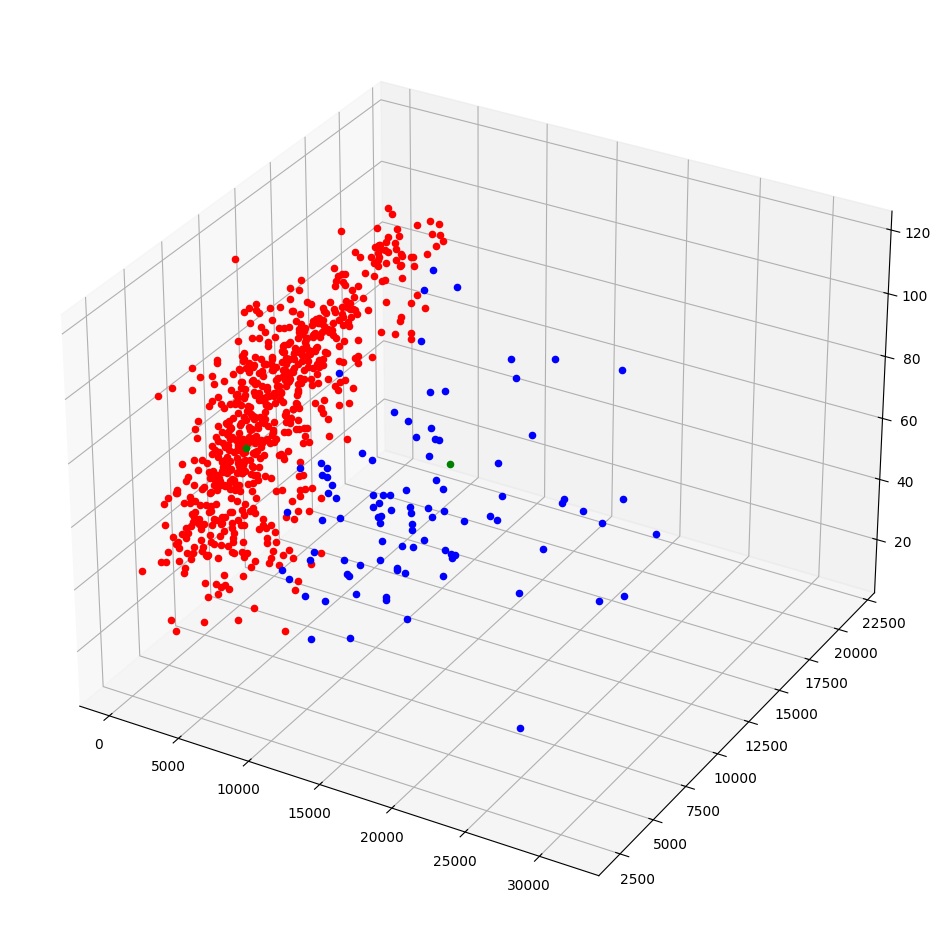

In [967]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')


# swap x and y: in for loop for red and blue, for loop cyan, real centroids
for i in range(data.shape[0]):
    if labels[i] == 0:
        ax.scatter(data[i][1], data[i][0], data[i][2], c='red')
    else:
        ax.scatter(data[i][1], data[i][0], data[i][2], c='blue')    

    
#ax.scatter(df.loc[:, 'Outstate'], df.loc[:, 'F.Undergrad'], df.loc[:, 'Grad.Rate'])
for i in range(centroids.shape[0]):
   ax.scatter(centroids[i][1], centroids[i][0], centroids[i][2], color='green')

plt.show()

In [968]:
def find_actual_centroids(data):    
    private_cnt = df['Private'].value_counts()['Yes']
    public_cnt = df['Private'].value_counts()['No']
    privates = np.zeros(data.shape[1])
    publics = np.zeros(data.shape[1])
    
    for i in range(data.shape[0]):
        if label_data[i] == "Yes":
            privates += data[i]
        else:
            publics += data[i]
    
    priv = privates / private_cnt
    pub = publics / public_cnt
    
    return pub, priv

In [969]:
print(find_actual_centroids(data))

(array([6813.41037736, 8571.00471698,   56.04245283]), array([11801.69380531,  1872.16814159,    68.99823009]))


In [970]:
cnt = 0
for i in range(data.shape[0]):
    if label_data[i] == "Yes" and labels[i] == 0:
        cnt += 1
    if label_data[i] == "No" and labels[i] == 1:
        cnt += 1
print(cnt/data.shape[0])

0.8172458172458172


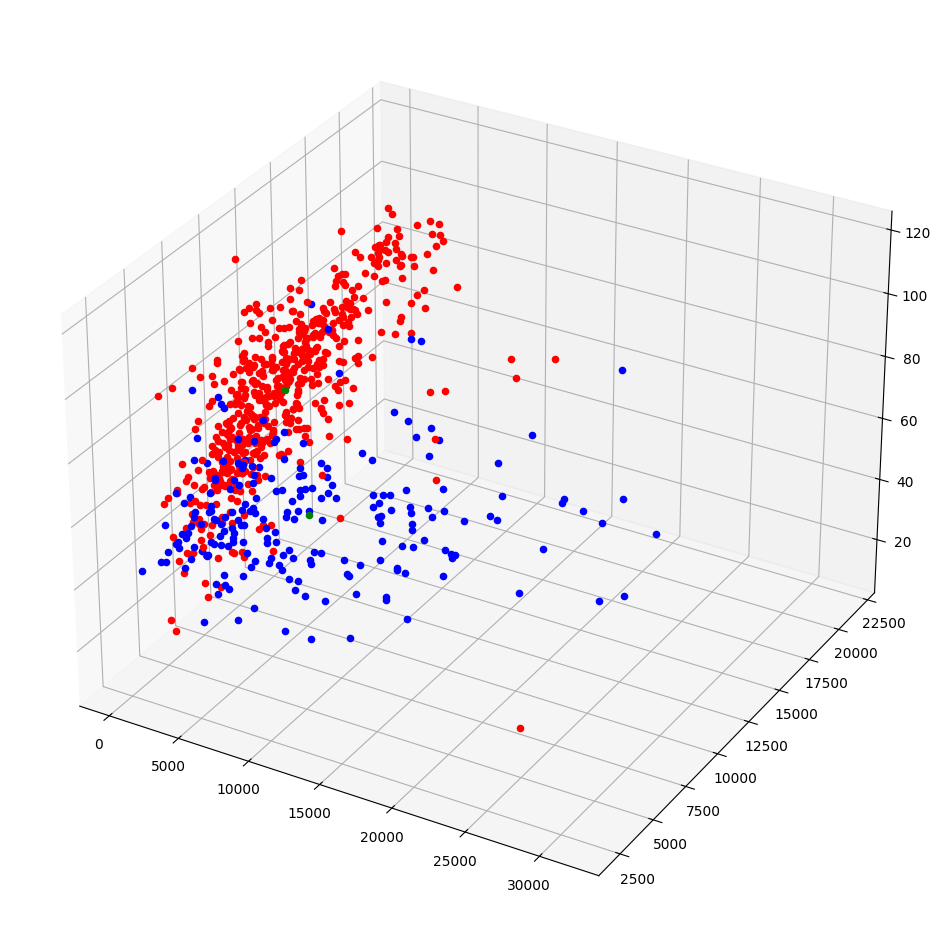

In [971]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

# swap x and y: in for loop for red and blue, for loop cyan, real centroids
for i in range(data.shape[0]):
    if label_data[i] == "Yes":
        ax.scatter(data[i][1], data[i][0], data[i][2], c='red')
    else:
        ax.scatter(data[i][1], data[i][0], data[i][2], c='blue')    

    
#for i in range(centroids.shape[0]):
#   ax.scatter(centroids[i][0], centroids[i][1], centroids[i][2], color='cyan')
    
ax.scatter(1872.16814159, 11801.69380531  , 68.99823009, color='green')
ax.scatter( 8571.00471698,6813.41037736, 56.04245283, color='green')

plt.show()

# Standardized Data

In [972]:
centroids_std, labels_std = k_means(data_std, 2)

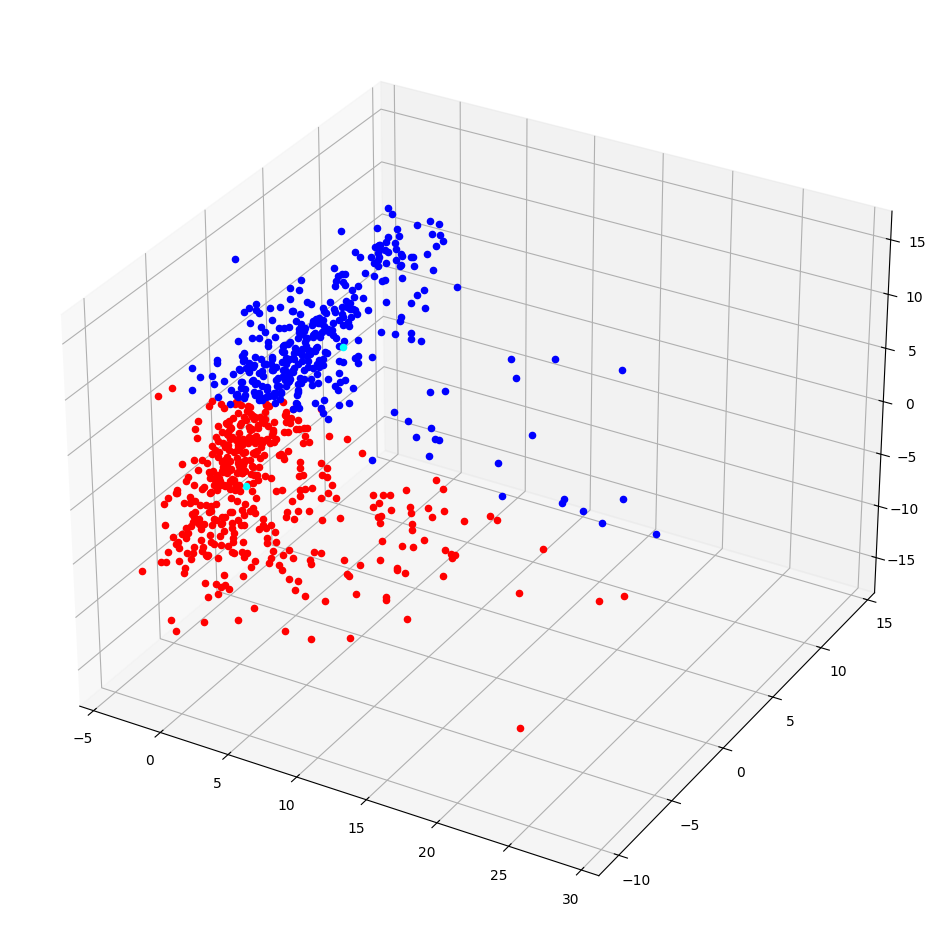

In [973]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')


# swap x and y: in for loop for red and blue, for loop cyan, real centroids
for i in range(data_std.shape[0]):
    if labels_std[i] == 0:
        ax.scatter(data_std[i][1], data_std[i][0], data_std[i][2], c='red')
    else:
        ax.scatter(data_std[i][1], data_std[i][0], data_std[i][2], c='blue')    

    
for i in range(centroids_std.shape[0]):
   ax.scatter(centroids_std[i][1], centroids_std[i][0], centroids_std[i][2], color='cyan')

plt.show()

In [974]:
print(find_actual_centroids(data_std))

(array([-4.51103702,  5.02454883, -2.7439443 ]), array([ 1.6926369 , -1.88531744,  1.02958618]))


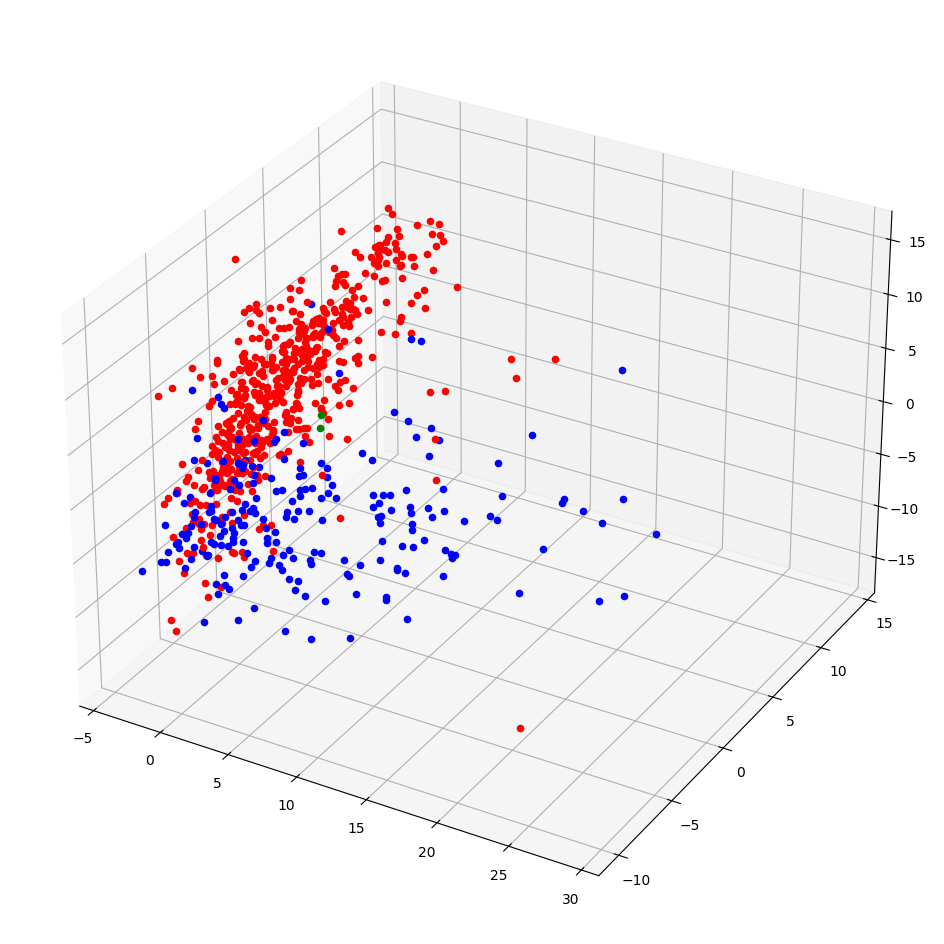

In [975]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

# swap x and y: in for loop for red and blue, for loop cyan, real centroids
for i in range(data_std.shape[0]):
    if label_data[i] == "Yes":
        ax.scatter(data_std[i][1], data_std[i][0], data_std[i][2], c='red')
    else:
        ax.scatter(data_std[i][1], data_std[i][0], data_std[i][2], c='blue')    


ax.scatter(1.07536597,1.35317623,   0.0072776, color='green')
ax.scatter( 1.86382793,0.29433948, 0.00932542, color='green')

plt.show()

# Compare K-Values

In [976]:
def sum_squared_error(data, centroids, labels: np.array):
    d = 0
    for i in range(data.shape[0]):
        d += np.sum((data[i] - centroids[int(labels[i])]) ** 2)
        
    return d

In [977]:
errors = np.empty(10)
k_values = range(1, 11)

for k in range(10):
    centroids, labels = k_means(data, k)
    print(labels)
    errors[k] = sum_squared_error(data, centroids, labels)

# Plot the scree plot
plt.plot(k_values, errors, 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Errors')
plt.title('Scree Plot')
plt.show()

[3.088e-321 6.818e-322 6.917e-322 1.329e-321 3.765e-321 1.759e-321
 7.411e-322 7.559e-322 2.609e-321 3.953e-322 9.387e-323 9.190e-322
 6.324e-322 2.910e-321 7.016e-322 2.372e-322 2.787e-321 1.561e-321
 1.591e-321 1.482e-322 1.067e-321 1.008e-321 6.571e-322 2.703e-321
 2.935e-321 2.465e-321 1.151e-321 8.300e-322 3.547e-321 1.724e-321
 2.880e-321 1.191e-321 1.314e-321 7.312e-322 1.117e-321 1.774e-321
 7.905e-322 1.808e-321 3.814e-321 2.105e-321 3.454e-321 3.103e-321
 3.557e-322 2.811e-321 2.890e-321 1.087e-321 3.063e-321 1.606e-321
 3.824e-321 3.192e-321 7.806e-322 3.256e-321 2.969e-321 1.181e-321
 1.146e-321 1.551e-321 1.294e-321 1.280e-321 1.077e-321 8.696e-322
 2.539e-321 1.186e-321 3.374e-321 3.686e-321 2.080e-321 1.675e-321
 3.320e-321 2.075e-321 2.001e-321 1.299e-321 3.068e-321 1.260e-321
 1.393e-321 3.384e-321 4.595e-322 1.709e-321 2.628e-321 3.780e-321
 2.288e-321 6.423e-322 1.112e-321 3.503e-321 1.532e-322 5.632e-322
 7.115e-322 1.630e-321 1.858e-321 3.152e-321 1.403e-321 2.485e

IndexError: index 0 is out of bounds for axis 0 with size 0